# Modele pożaru lasu i rozprzestrzeniania się epidemii, Greenberg-Hastings

Wykład: https://github.com/houp/ca-class/blob/main/slides/lecture11.pdf

### Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### zad.18
Zaimplementuj jeden z wybranych modeli prezentowanych na wykładzie: DS FFM, SIR lub GH. Jeśli to możliwe (jeśli masz ciekawy pomysł) to wprowadź wybraną modyfikację do wybranego przez Ciebie modelu, np.:
- W modelu SIR wprowadź stan "śmierć", który osiąga się z małym prawdopodobieństwem przy infekcji i zobacz jak inne parametry wpływają na śmiertelność epidemii.
- W modelu FFM wprowadź kierunek wiatru - tzn. prawdopodobieństwo podpalenia może być inne zależnie od tego z której strony sąsiad się pali.
- W modelu GH - poeksperymentuj z liczbą stanów recovery i spróbuj znaleźć wartość krytycznego prawdopodobieństwa przy których, dla zadanej liczby stanów, model istotnie zmienia swoje właściwości.

Rozwiązaniem jest program, który robi wizualizację (w pygame) oraz prezentuje w jakiejś formie wyniki eksperymentów - opis + wykres w notebooku.

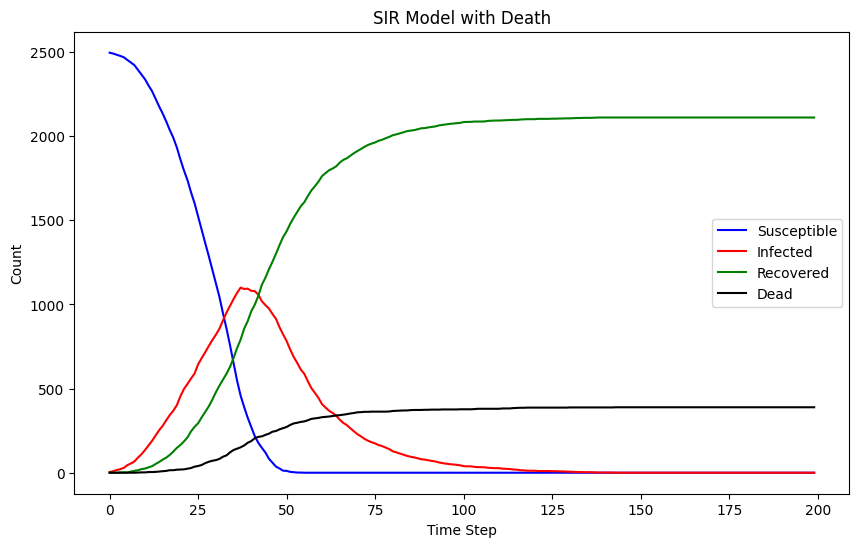

In [6]:
# Symulacja modelu SIR z dodatkiem stanu "śmierć"
def simulate_sir_with_death(grid_size, steps, prob_infection, prob_death, prob_recovery):
    grid = np.zeros((grid_size, grid_size), dtype=int)
    grid[grid_size//2, grid_size//2] = 1  # Początkowa infekcja
    
    susceptible_counts = []
    infected_counts = []
    recovered_counts = []
    dead_counts = []
    
    for step in range(steps):
        new_grid = grid.copy()
        for i in range(grid_size):
            for j in range(grid_size):
                if grid[i, j] == 1:  # Zainfekowany
                    if np.random.rand() < prob_death:
                        new_grid[i, j] = 3  # Śmierć
                    elif np.random.rand() < prob_recovery:
                        new_grid[i, j] = 2  # Wyzdrowienie
                    else:
                        for ni in range(i-1, i+2):
                            for nj in range(j-1, j+2):
                                if 0 <= ni < grid_size and 0 <= nj < grid_size and grid[ni, nj] == 0:
                                    if np.random.rand() < prob_infection:
                                        new_grid[ni, nj] = 1  # Infekcja
        
        grid = new_grid
        susceptible_counts.append(np.sum(grid == 0))
        infected_counts.append(np.sum(grid == 1))
        recovered_counts.append(np.sum(grid == 2))
        dead_counts.append(np.sum(grid == 3))
    
    return susceptible_counts, infected_counts, recovered_counts, dead_counts

# Parametry symulacji
grid_size = 50
steps = 200
prob_infection = 0.2
prob_death = 0.01
prob_recovery = 0.05

# Wykonanie symulacji
susceptible_counts, infected_counts, recovered_counts, dead_counts = simulate_sir_with_death(
    grid_size, steps, prob_infection, prob_death, prob_recovery)

# Wykresy wyników
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label='Susceptible', color='blue')
plt.plot(infected_counts, label='Infected', color='red')
plt.plot(recovered_counts, label='Recovered', color='green')
plt.plot(dead_counts, label='Dead', color='black')
plt.xlabel('Time Step')
plt.ylabel('Count')
plt.title('SIR Model with Death')
plt.legend()
plt.show()